In [1]:
import Sokoban_env
from Sokoban_env1 import Sokoban_v2
import numpy as np
import matplotlib.pyplot as plt




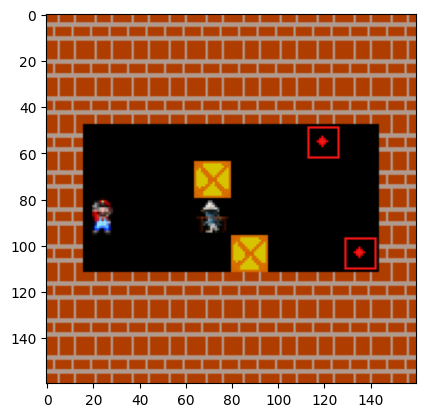

In [2]:
env = Sokoban_v2(map_name="special_3") 
env.reset()
plt.imshow(env.render())

In [3]:
alpha = 0.85
gamma = 0.90
epsilon = 0.8

In [11]:
import numpy as np

def monte_carlo(env, learning_rate, discount_factor, epsilon, num_episodes):
    state_space = env.num_states.n
    action_space = env.action_space.n

    # Initialize the Q-table and returns table
    q_table = np.zeros((state_space, action_space))
    returns_sum = np.zeros((state_space, action_space))
    returns_count = np.zeros((state_space, action_space))
    eva = []  # To track total rewards per episode

    # Monte Carlo algorithm
    for episode in range(num_episodes):
        if episode % 50 == 0:
            print(f'---- Episode: {episode}')

        # Generate an episode following the epsilon-greedy policy
        episode_data = []
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Random action
            else:
                action = np.argmax(q_table[state, :])  # Greedy action

            next_state, reward, done, _ = env.step(action)
            episode_data.append((state, action, reward))
            state = next_state
            total_reward += reward

        # Track rewards for evaluation
        eva.append(total_reward)

        # Update Q-values based on the episode
        G = 0  # Initialize the return
        visited = set()  # To ensure first-visit Monte Carlo

        # Traverse the episode backwards
        for t in reversed(range(len(episode_data))):
            state, action, reward = episode_data[t]
            G = discount_factor * G + reward  # Calculate cumulative discounted return

            if (state, action) not in visited:
                # Mark the state-action pair as visited
                visited.add((state, action))

                # Update the returns sum and count for this state-action pair
                returns_sum[state, action] += G
                returns_count[state, action] += 1

                # Update Q-value for the state-action pair
                q_table[state, action] = returns_sum[state, action] / returns_count[state, action]

    return q_table, eva


In [12]:
q_table,eva = monte_carlo(env, learning_rate = 0.01, discount_factor = 0.9, epsilon = 0.8, num_episodes= 5000)

---- Episode: 0
---- Episode: 50
---- Episode: 100
---- Episode: 150
---- Episode: 200
---- Episode: 250
---- Episode: 300
---- Episode: 350
---- Episode: 400
---- Episode: 450
---- Episode: 500
---- Episode: 550
---- Episode: 600
---- Episode: 650
---- Episode: 700
---- Episode: 750
---- Episode: 800
---- Episode: 850
---- Episode: 900
---- Episode: 950
---- Episode: 1000
---- Episode: 1050
---- Episode: 1100
---- Episode: 1150
---- Episode: 1200
---- Episode: 1250
---- Episode: 1300
---- Episode: 1350
---- Episode: 1400
---- Episode: 1450
---- Episode: 1500
---- Episode: 1550
---- Episode: 1600
---- Episode: 1650
---- Episode: 1700
---- Episode: 1750
---- Episode: 1800
---- Episode: 1850
---- Episode: 1900
---- Episode: 1950
---- Episode: 2000
---- Episode: 2050
---- Episode: 2100
---- Episode: 2150
---- Episode: 2200
---- Episode: 2250
---- Episode: 2300
---- Episode: 2350
---- Episode: 2400
---- Episode: 2450
---- Episode: 2500
---- Episode: 2550
---- Episode: 2600
---- Episode: 26

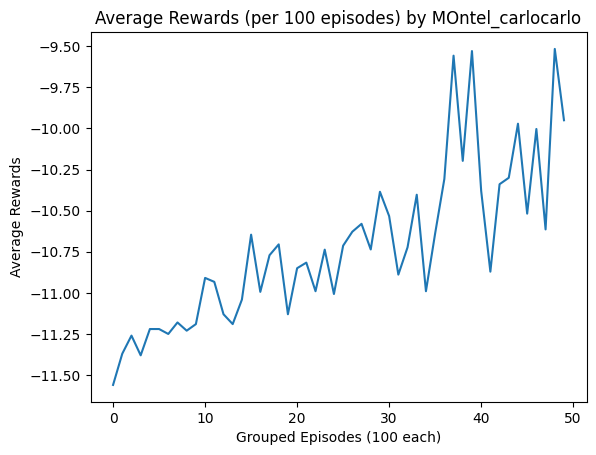

In [14]:
import matplotlib.pyplot as plt
group_size = 100
average_rewards = [sum(eva[i:i + group_size]) / group_size for i in range(0, len(eva), group_size)]

plt.plot(average_rewards)
plt.title('Average Rewards (per 100 episodes) by MOntel_carlocarlo')
plt.xlabel('Grouped Episodes (100 each)')
plt.ylabel('Average Rewards')
plt.show()


In [15]:
np.mean(eva)

-10.719559999999975

In [17]:
import pickle
with open('montel_carlo.pkl', 'wb') as file:
    pickle.dump(q_table, file)

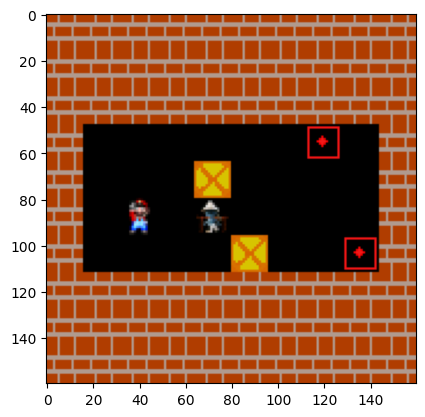

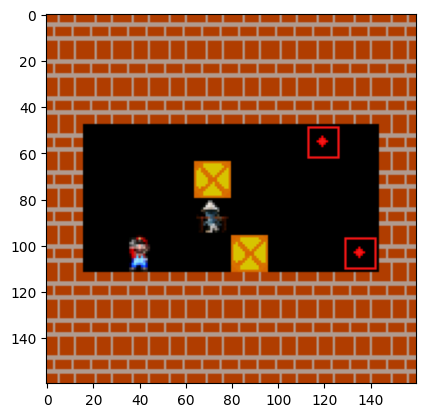

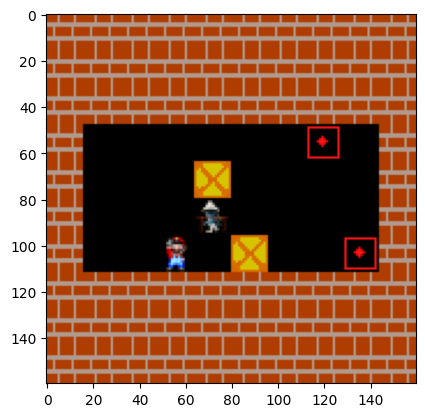

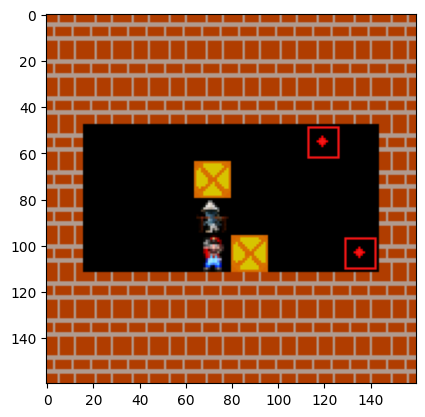

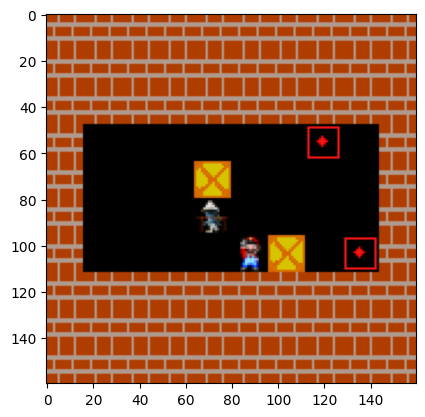

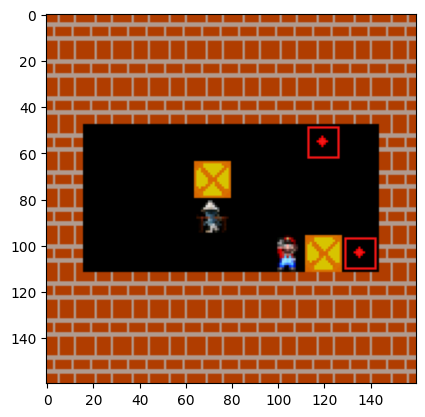

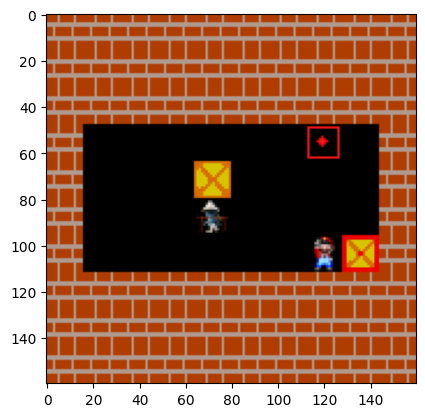

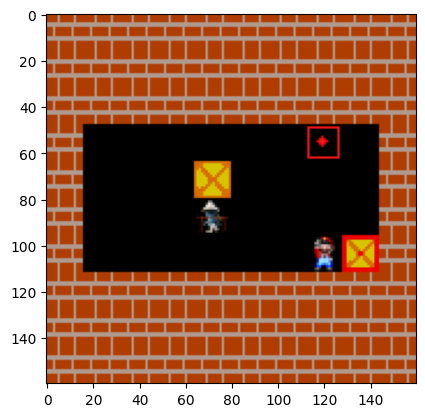

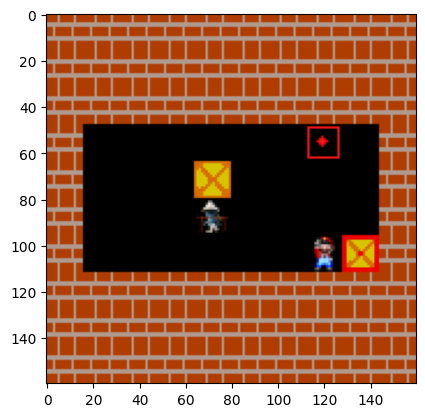

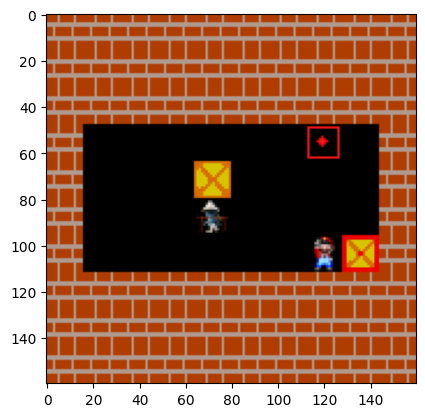

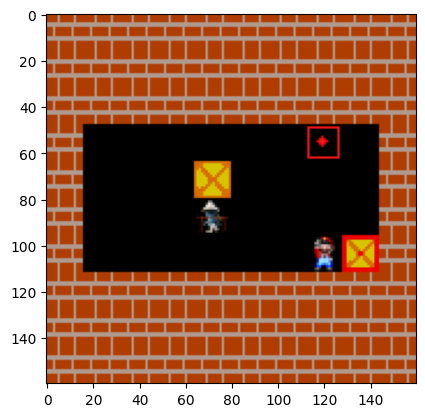

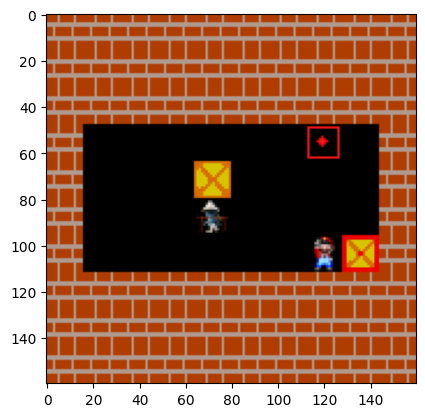

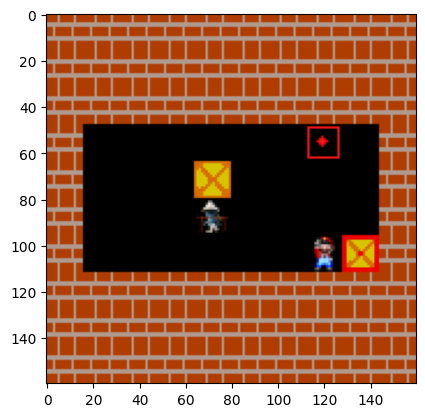

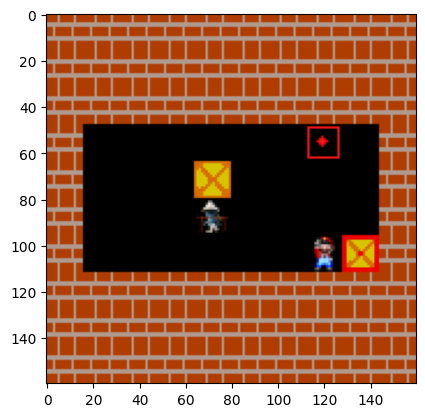

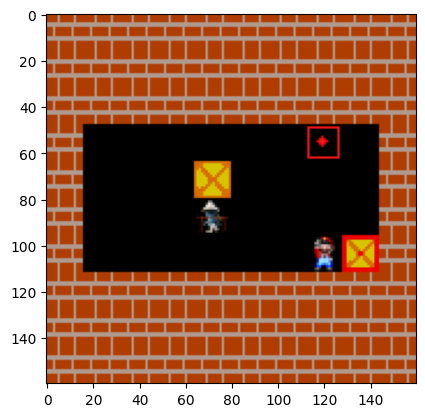

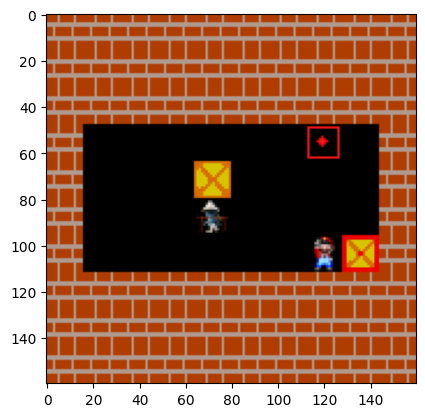

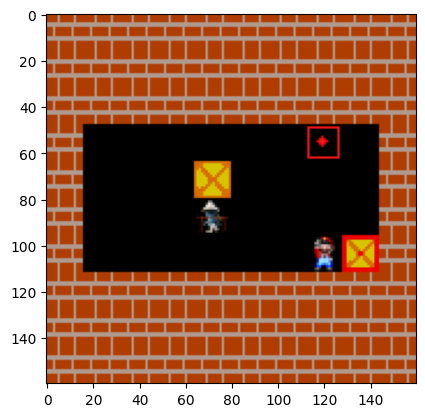

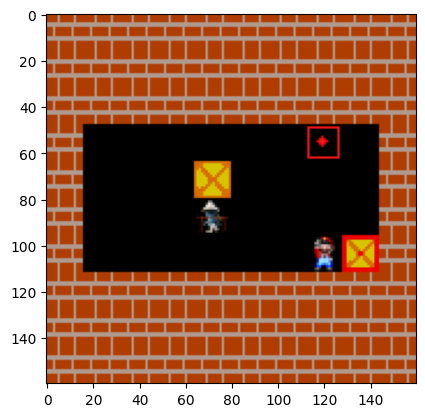

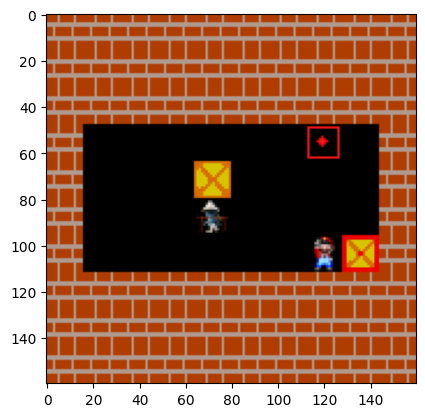

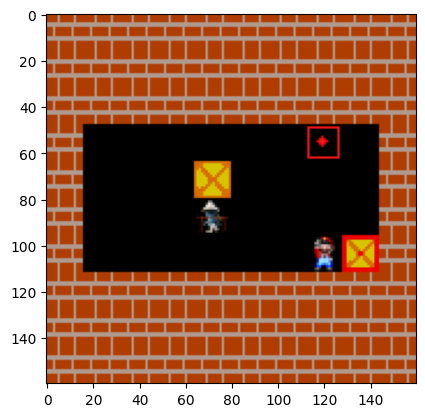

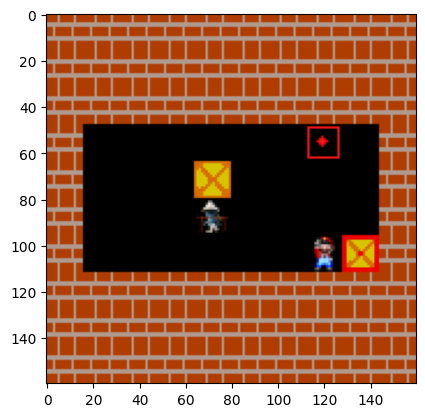

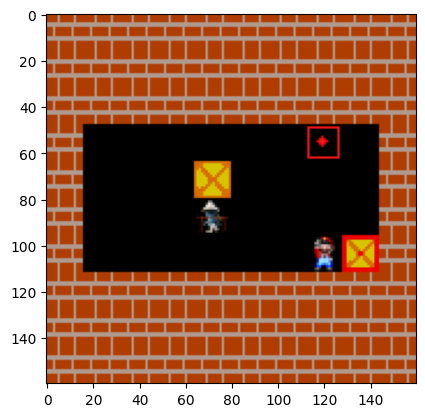

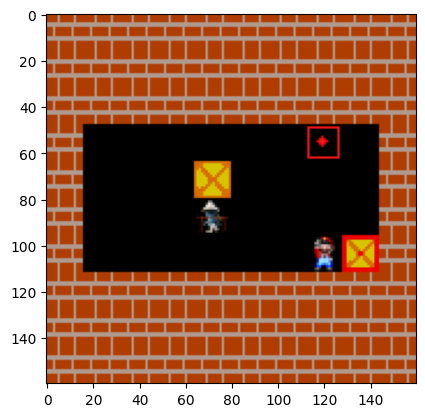

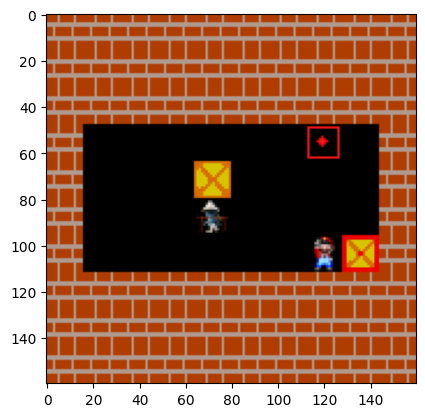

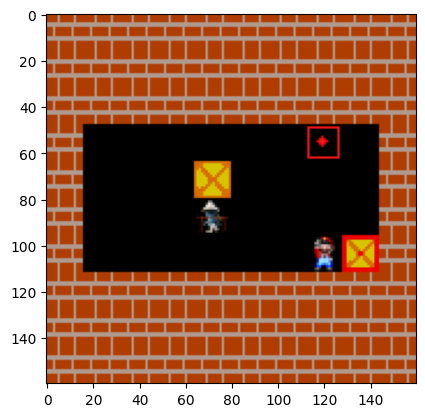

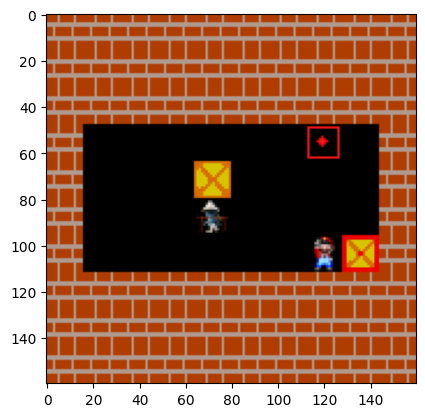

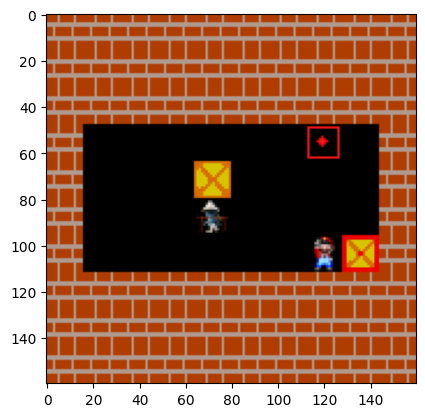

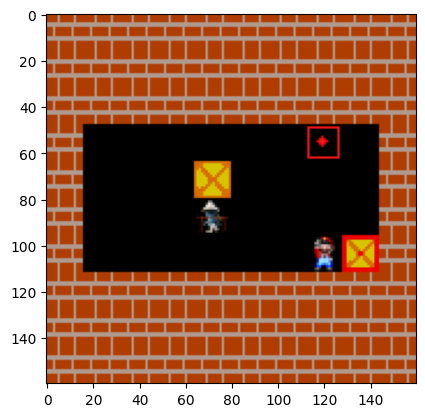

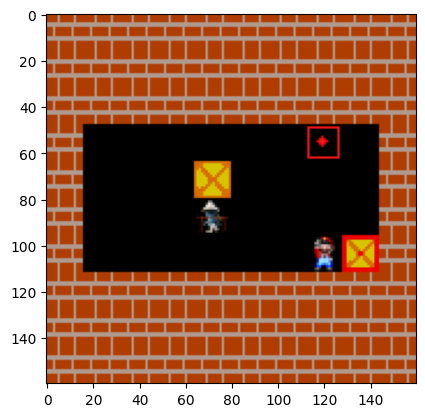

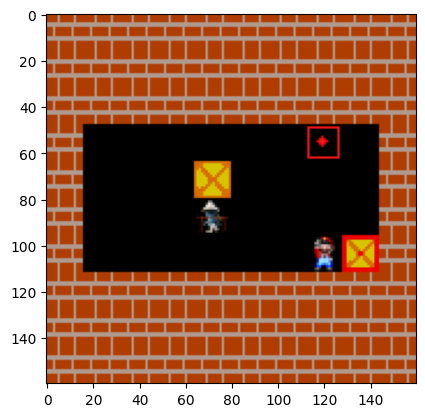

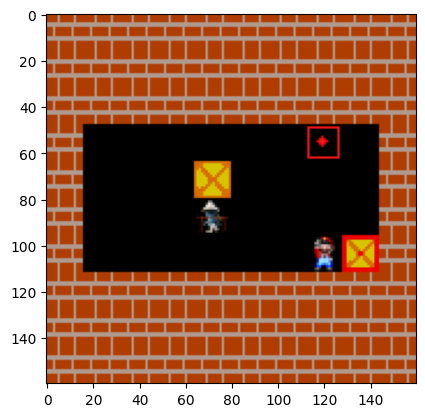

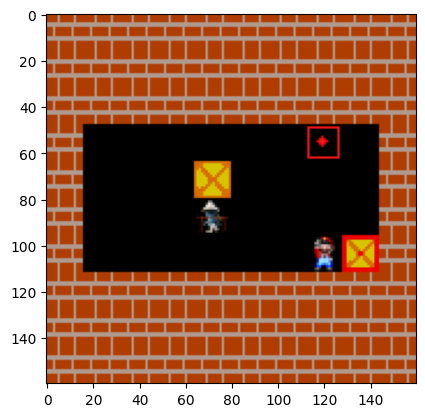

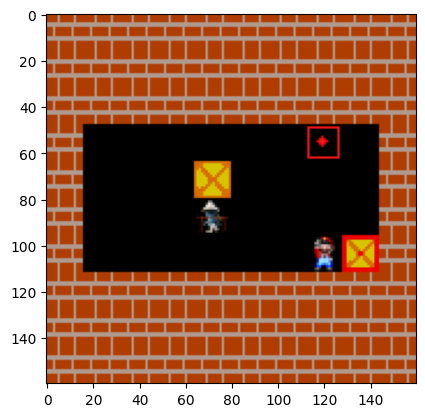

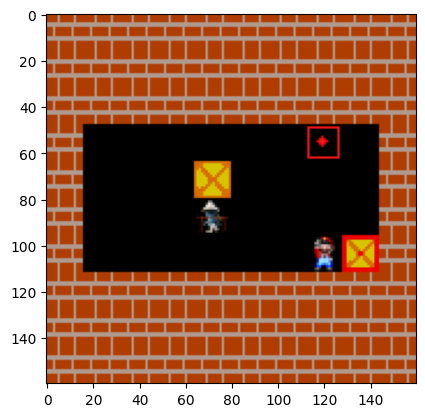

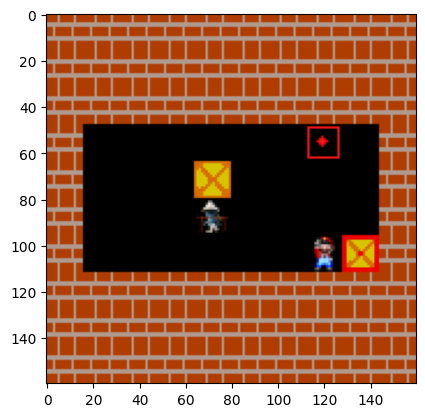

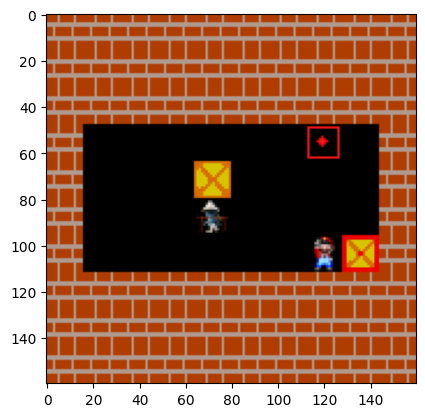

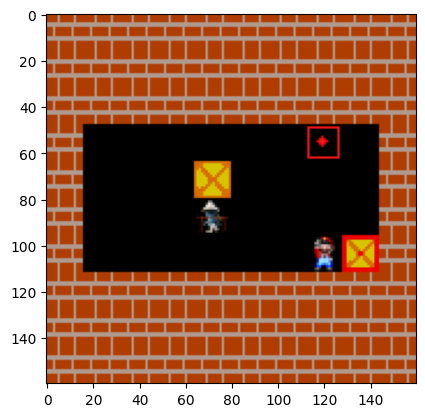

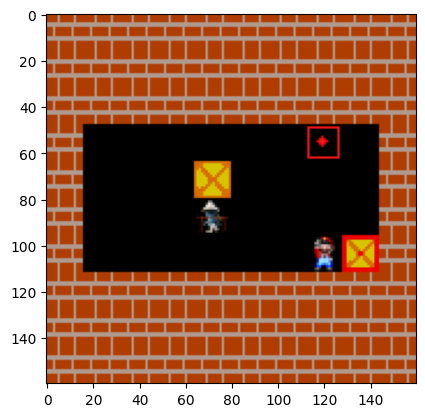

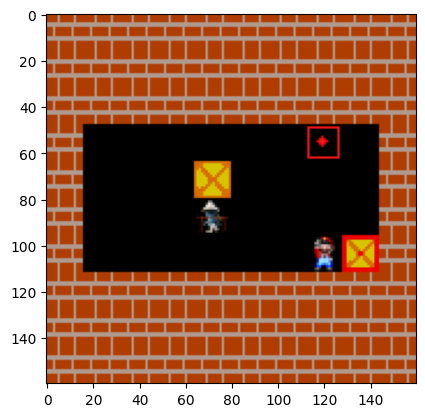

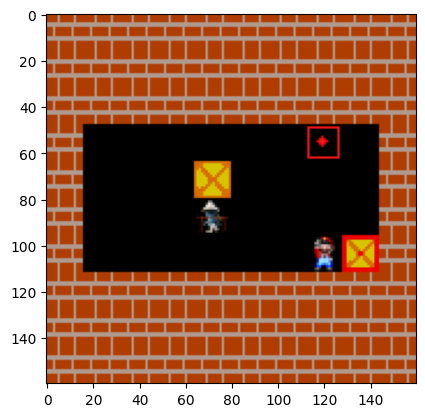

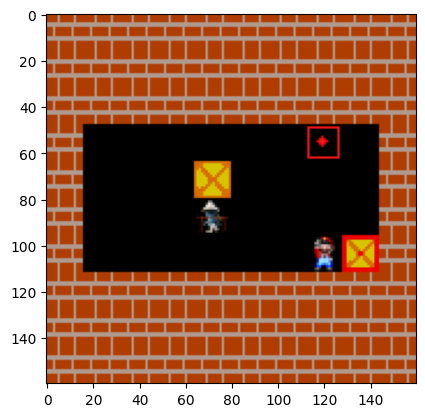

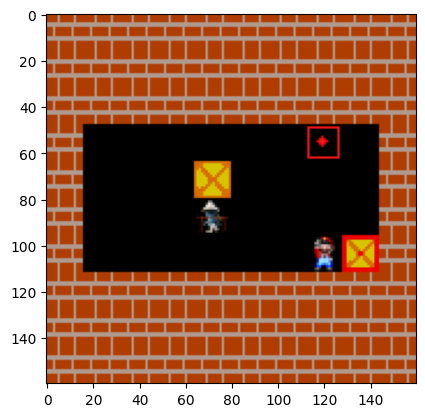

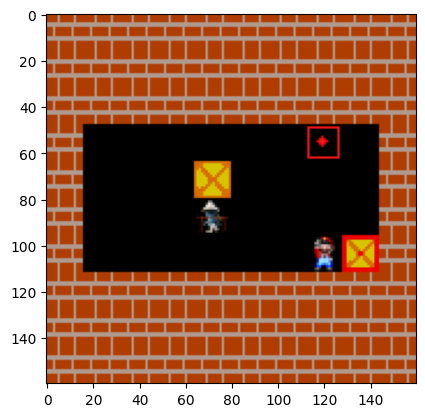

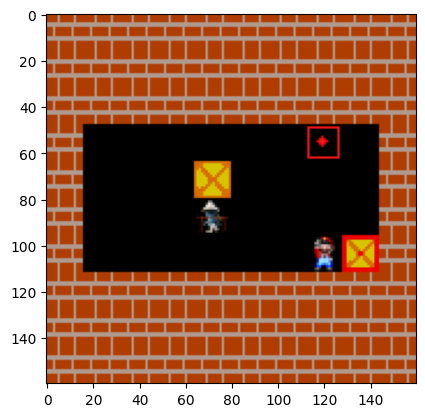

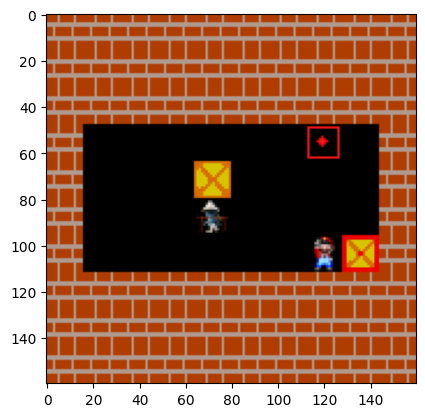

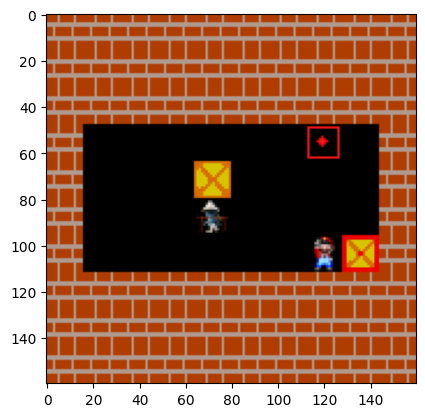

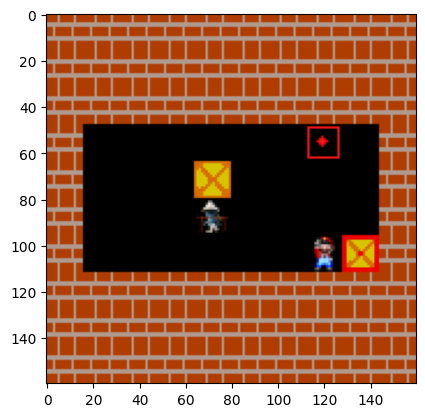

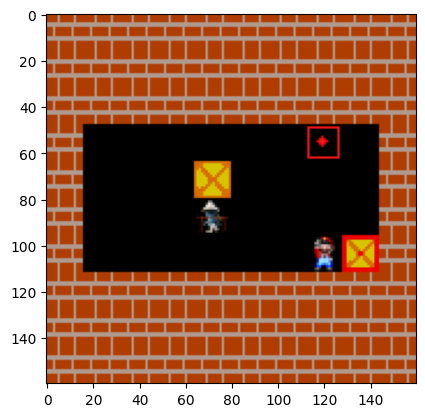

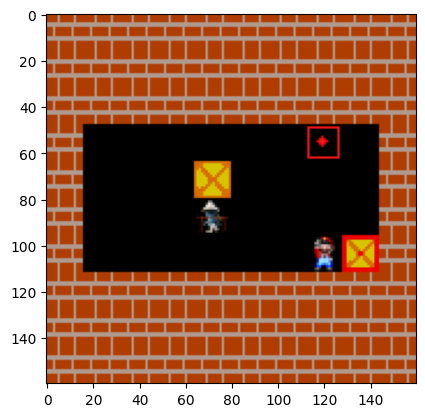

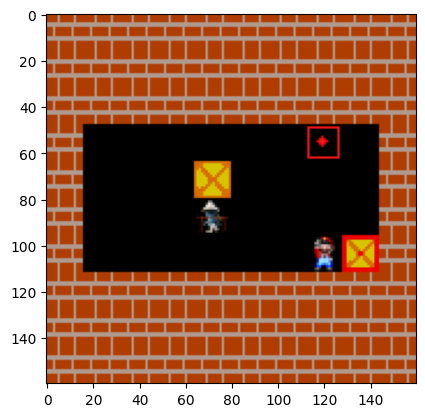

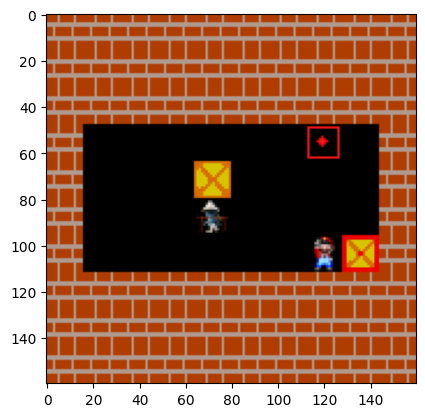

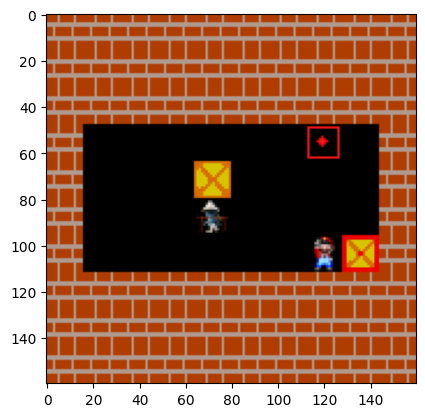

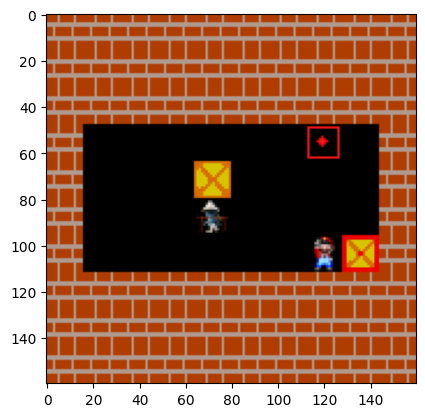

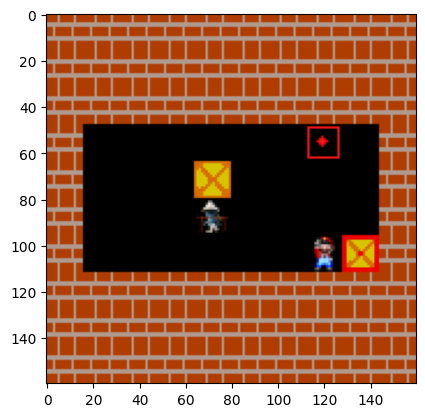

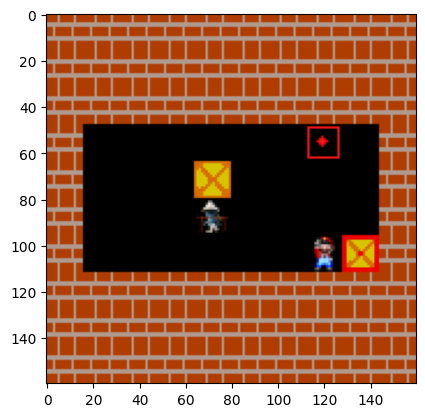

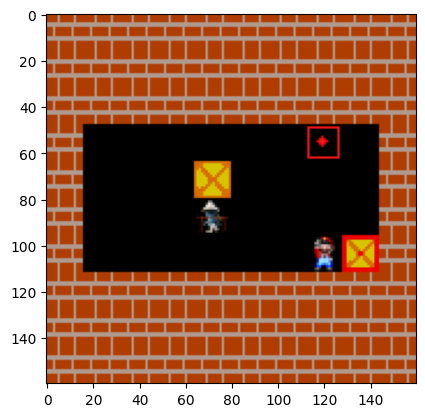

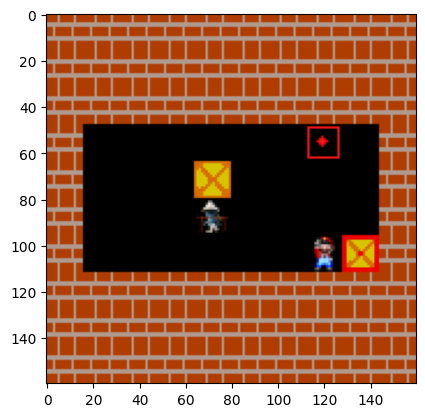

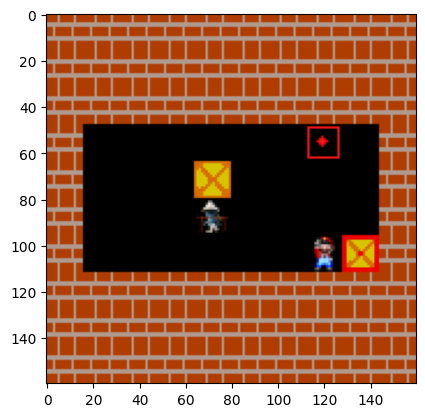

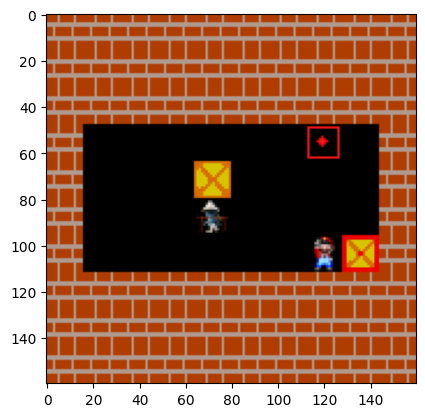

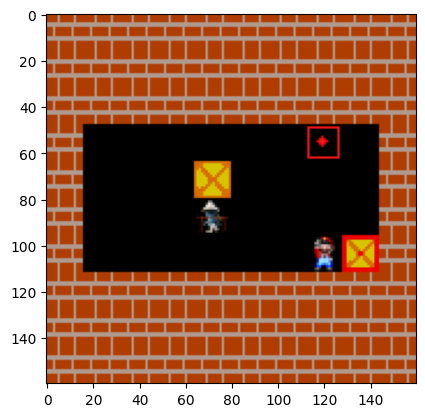

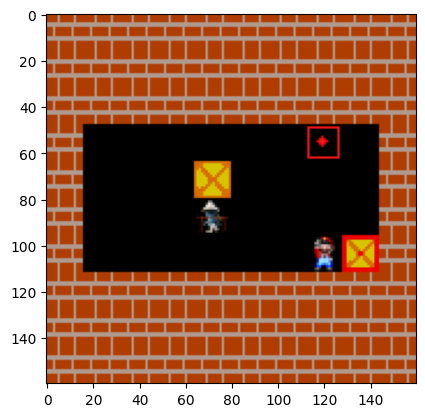

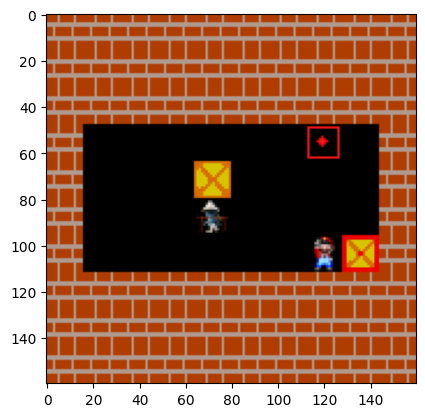

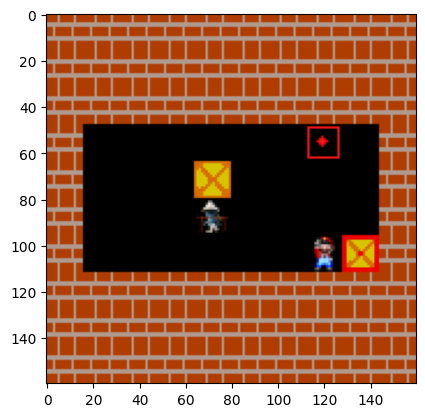

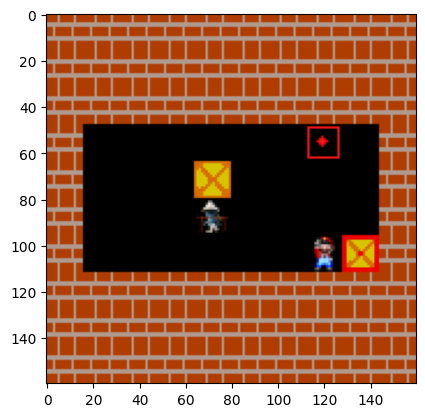

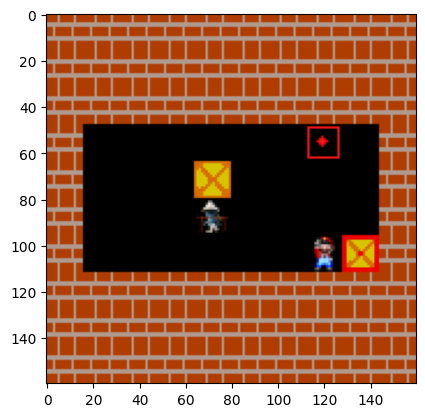

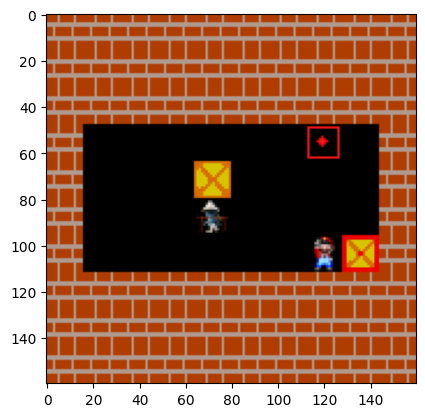

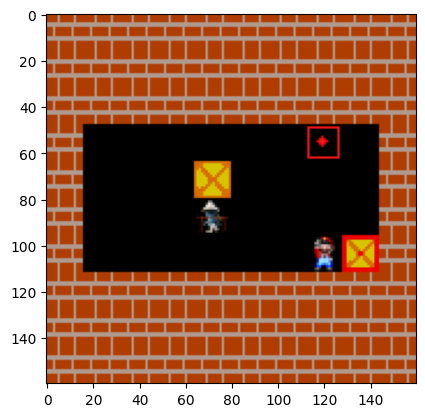

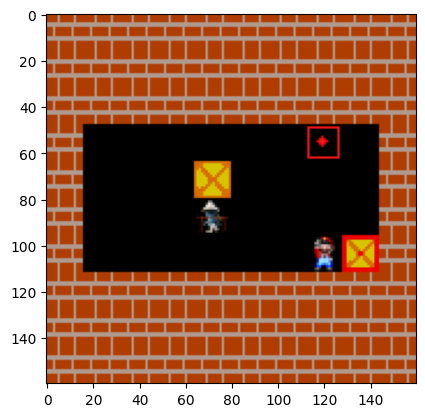

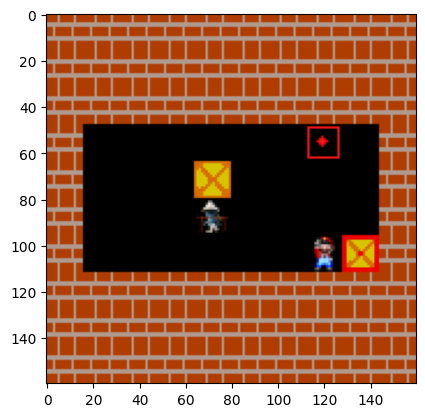

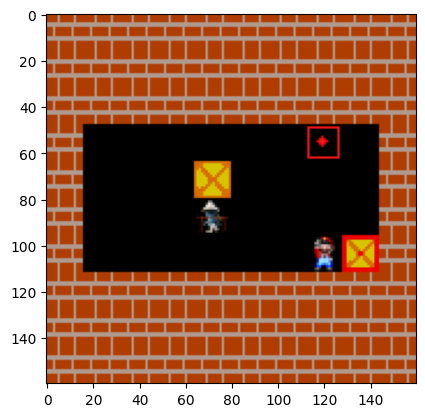

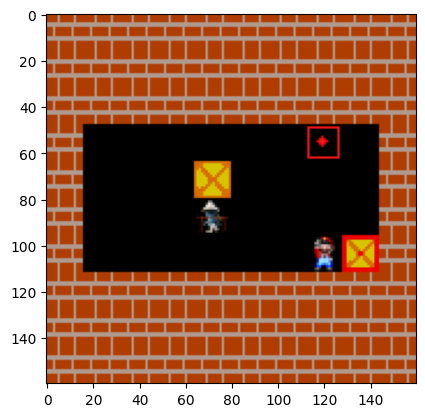

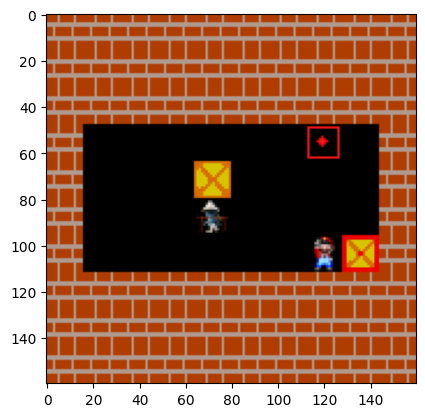

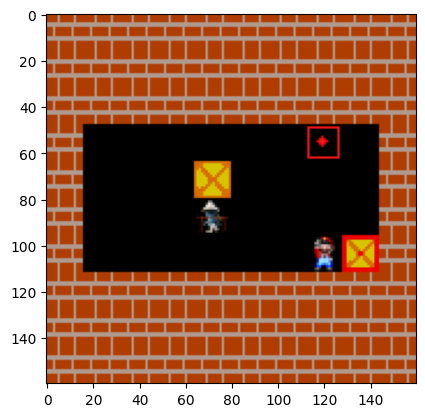

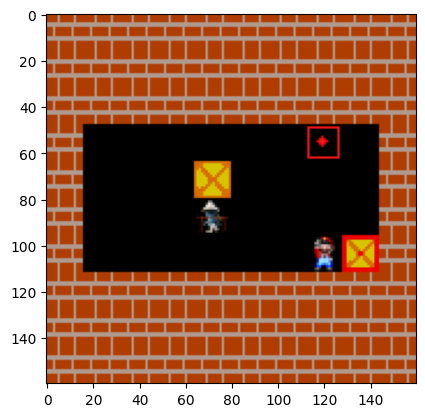

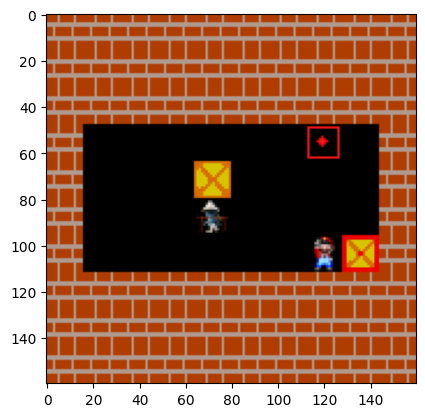

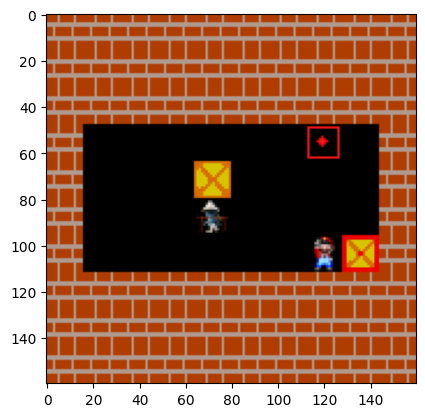

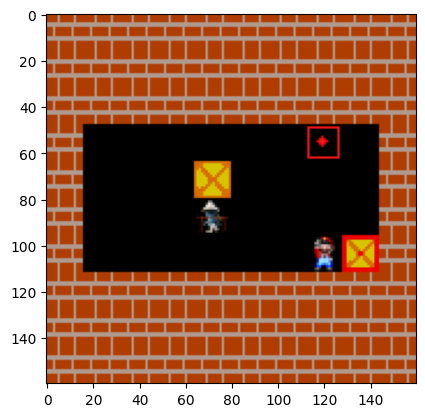

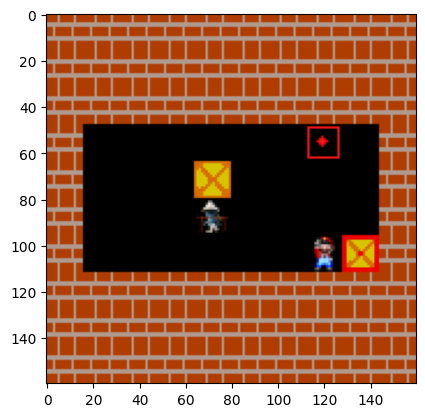

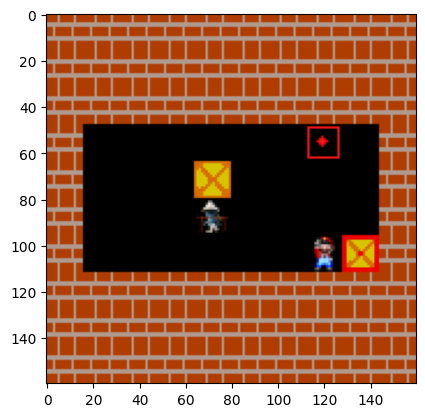

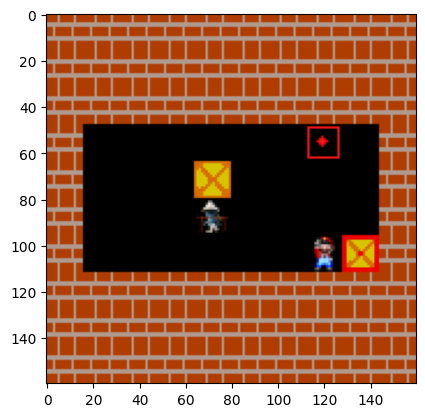

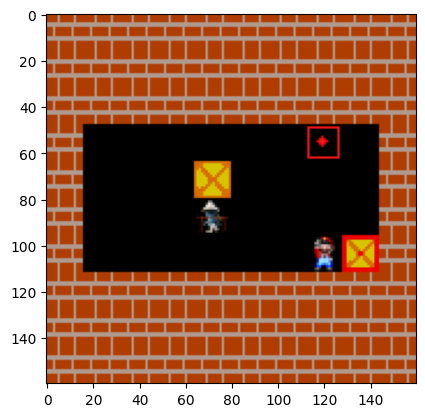

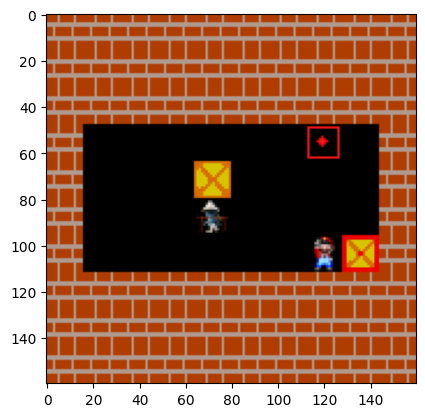

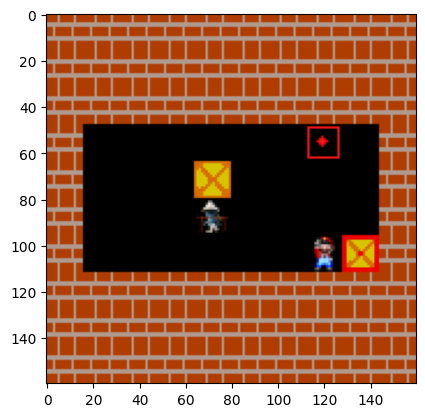

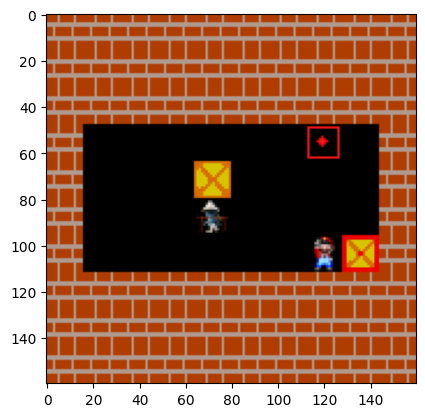

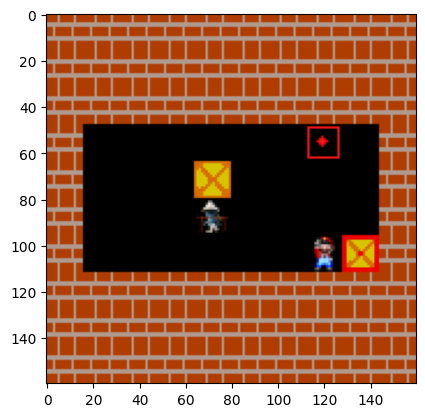

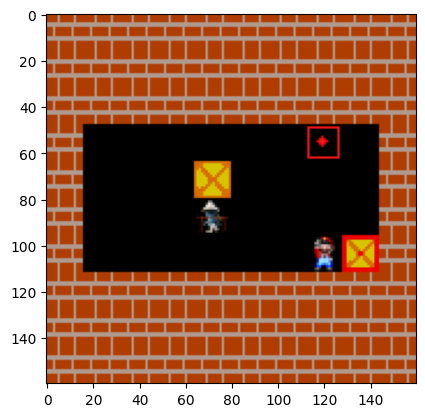

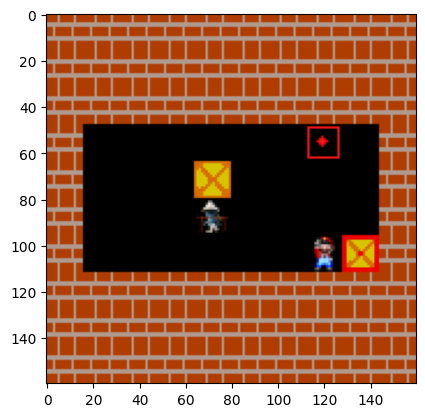

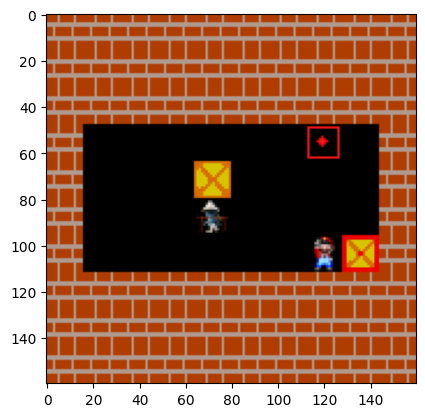

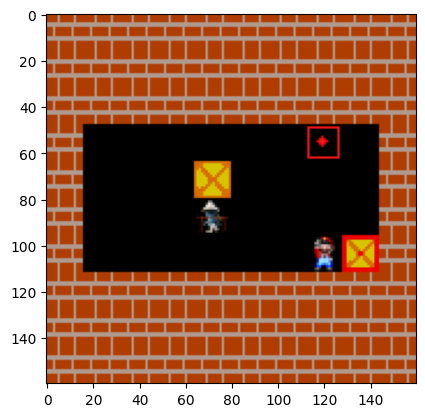

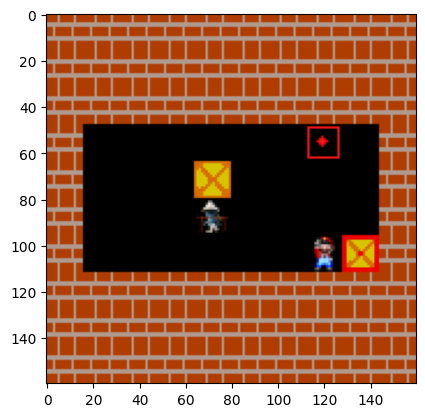

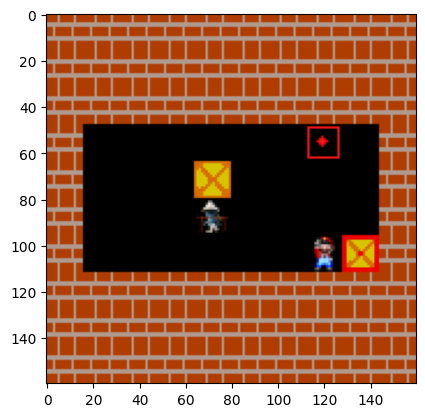

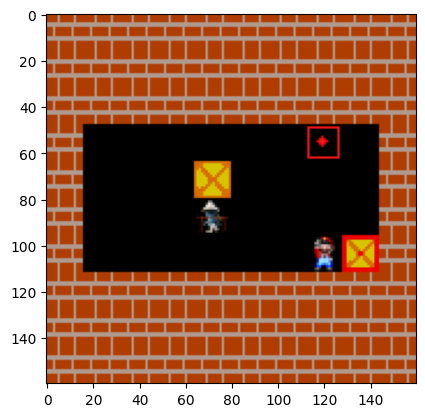

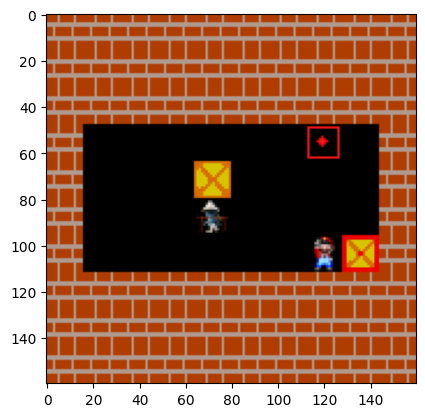

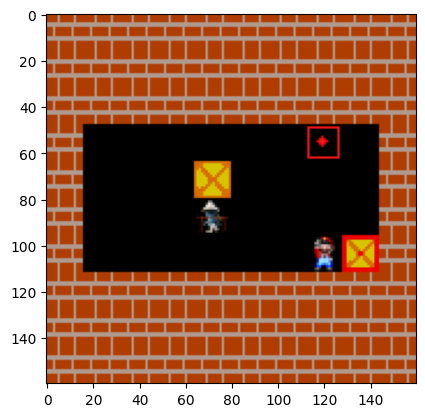

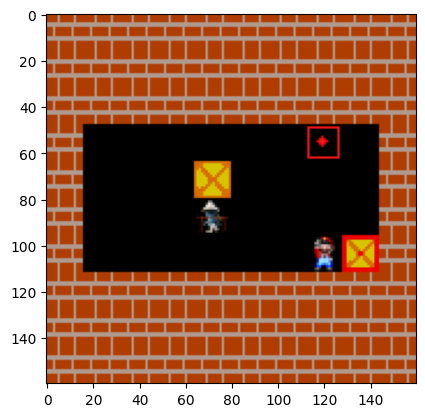

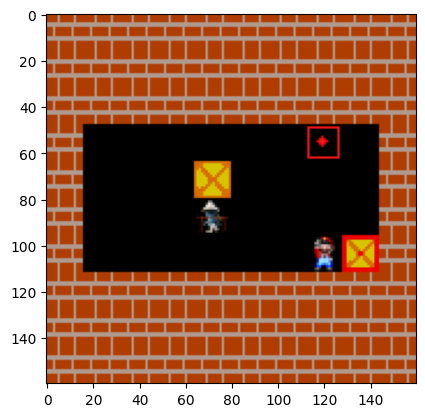

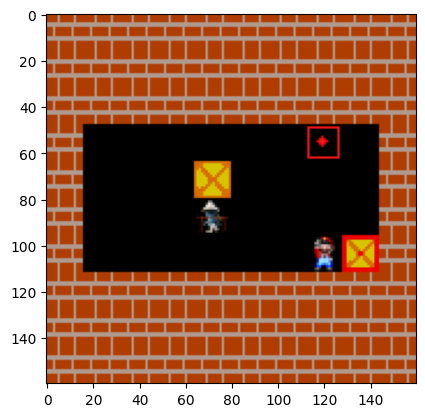

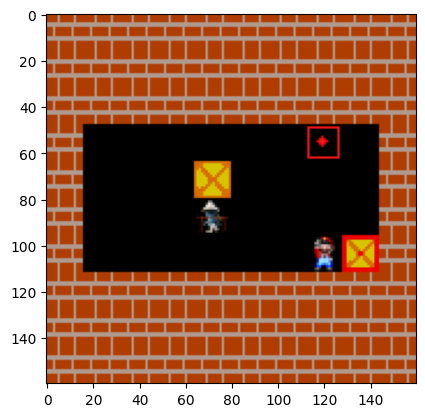

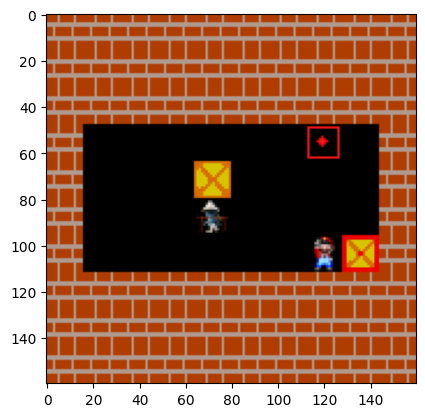

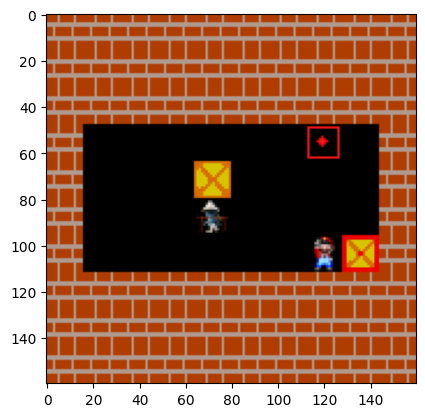

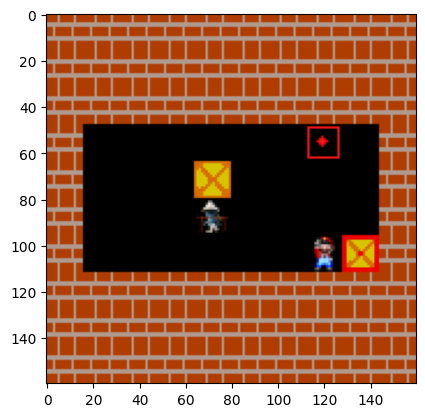

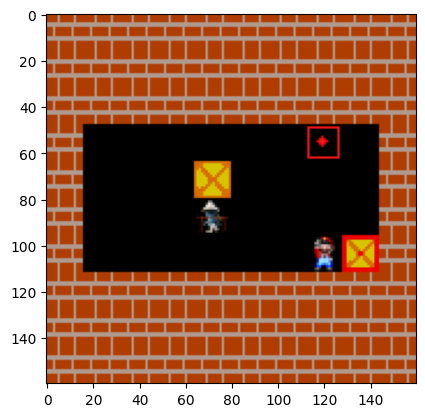

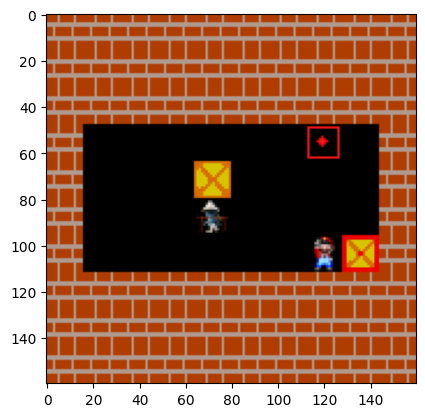

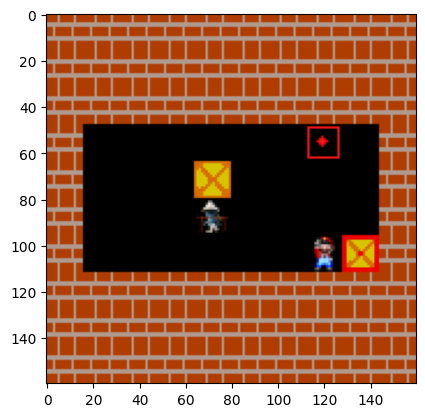

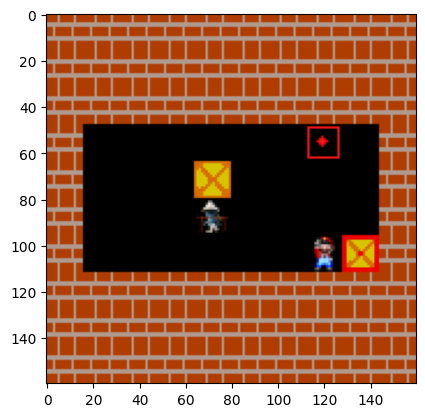

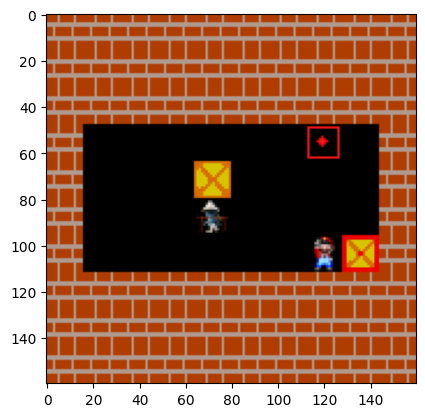

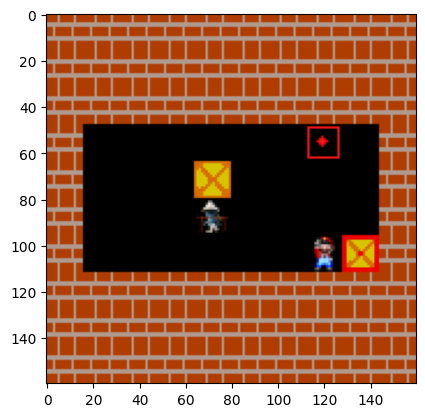

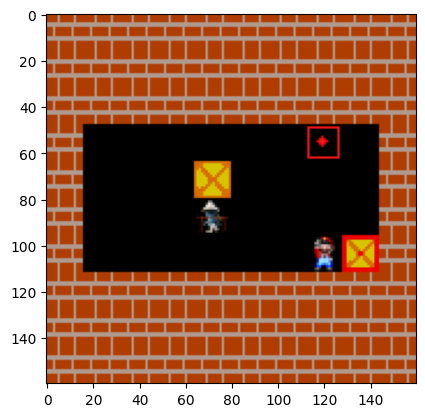

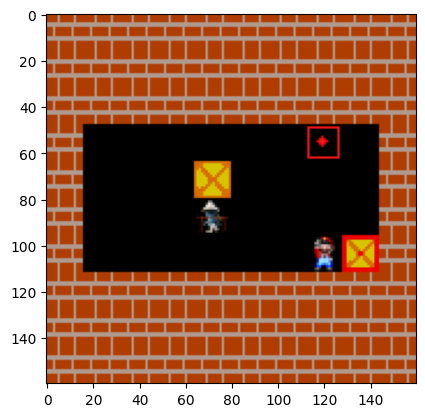

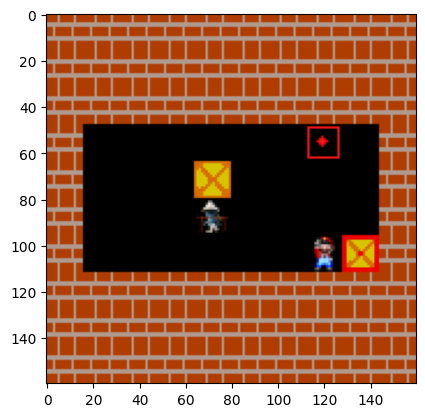

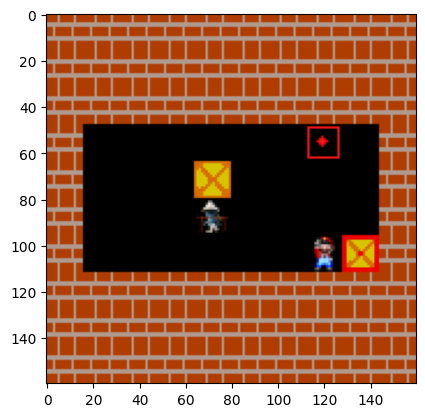

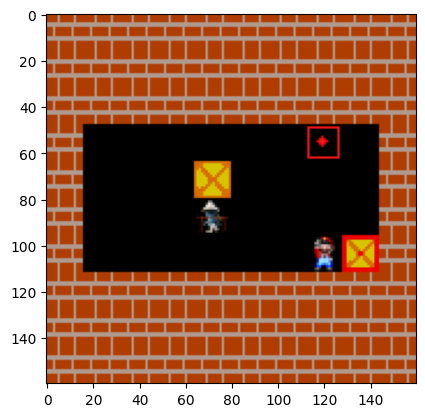

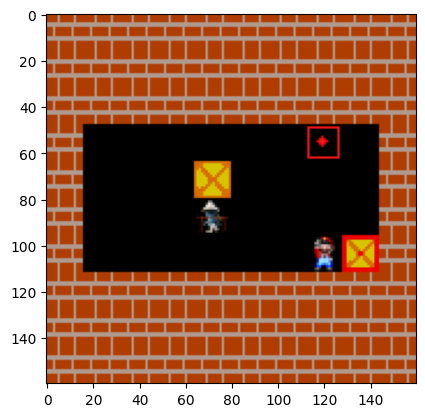

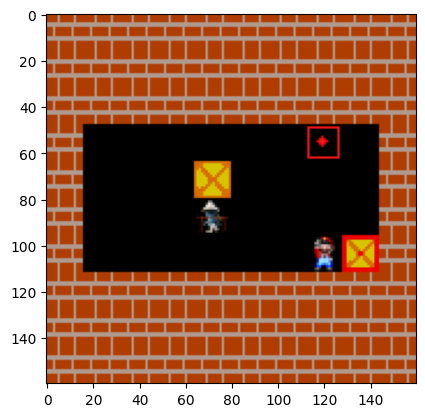

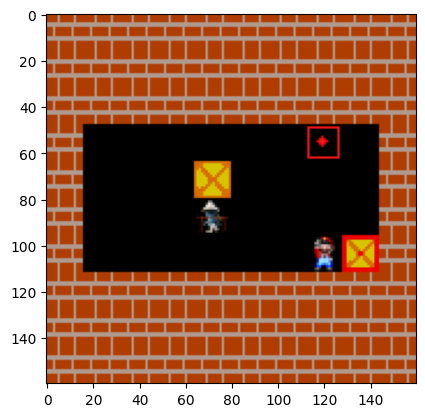

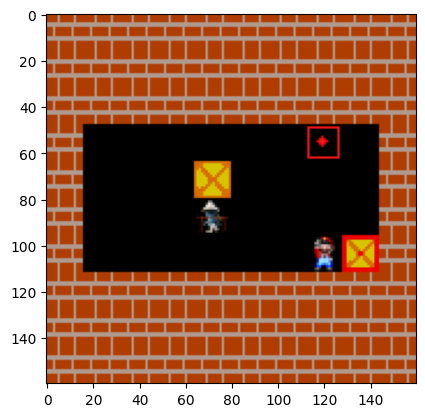

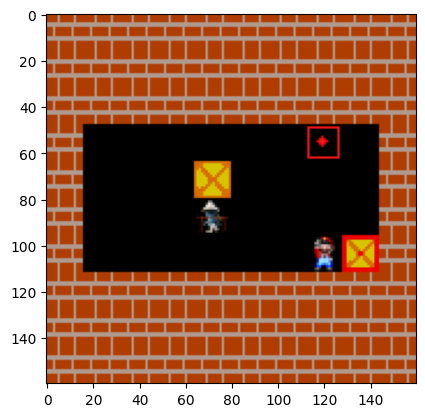

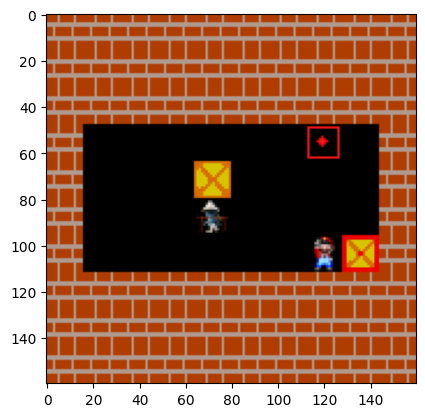

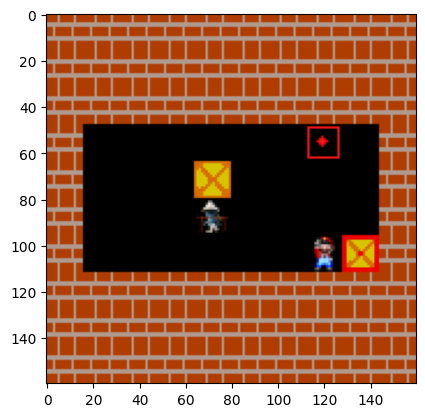

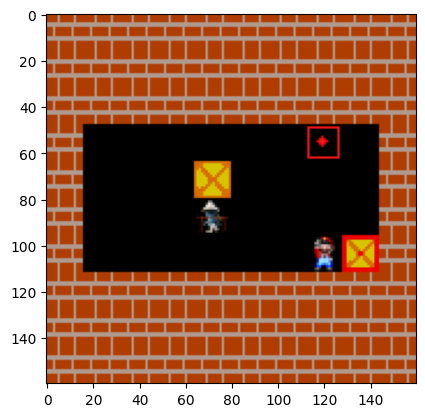

In [16]:
env.reset()
state = 0
while True:
    action = np.argmax(q_table[state,:])
    new_state, reward, done, _ = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.show()
    if done:
        break
    state = new_state
env.close()

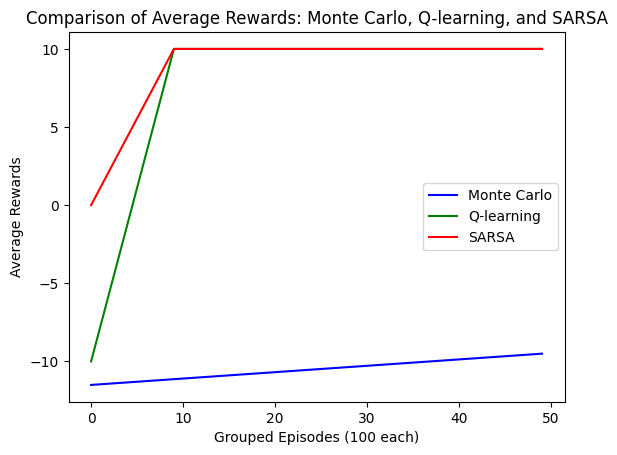

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Số nhóm tập (50 nhóm tập)
episodes = np.arange(0, 50)

# Dữ liệu ước lượng từ các biểu đồ mà cậu đã cung cấp:
rewards_monte_carlo = np.linspace(-11.5, -9.5, len(episodes))  # Monte Carlo: từ -11.5 lên -9.5
rewards_q_learning = np.concatenate((np.linspace(-10, 10, 10), np.full(40, 10)))  # Q-learning: từ -10 lên 10 nhanh
rewards_sarsa = np.concatenate((np.linspace(0, 10, 10), np.full(40, 10)))  # SARSA: từ 0 lên 10 và ổn định

# Vẽ ba đường trên cùng một biểu đồ
plt.plot(episodes, rewards_monte_carlo, label='Monte Carlo', color='blue')
plt.plot(episodes, rewards_q_learning, label='Q-learning', color='green')
plt.plot(episodes, rewards_sarsa, label='SARSA', color='red')

# Thêm tiêu đề và nhãn
plt.title('Comparison of Average Rewards: Monte Carlo, Q-learning, and SARSA')
plt.xlabel('Grouped Episodes (100 each)')
plt.ylabel('Average Rewards')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
